# WordCloud

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import konlpy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path
import matplotlib as mpl
import matplotlib.font_manager as fm

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [3]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [11]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 226
nanum_font number: 8


In [13]:
path = 'C:\\Users\\ay011\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquareL.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumSquare


## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

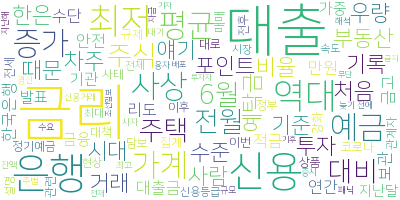

In [15]:
wc = WordCloud(font_path=path, background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(c)
cloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [26]:
df = pd.read_csv('train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
df['datetime'] = pd.to_datetime(df['datetime'])

## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [28]:
df['year'] = df['datetime'].dt.strftime('%Y')
df['month'] = df['datetime'].dt.strftime('%m')
df['day'] = df['datetime'].dt.strftime('%d')
df['hour'] = df['datetime'].dt.strftime('%H')
df['minute'] = df['datetime'].dt.strftime('%M')
df['second'] = df['datetime'].dt.strftime('%S')
df['day'] = df['datetime'].dt.strftime('%A')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,01,Saturday,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,01,Saturday,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,01,Saturday,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,01,Saturday,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,01,Saturday,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,Wednesday,22,00,00


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

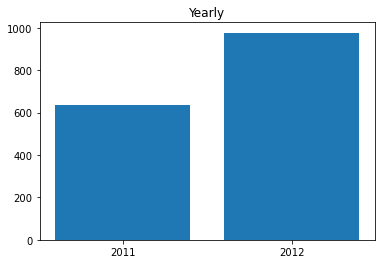

In [29]:
plt.bar(data=df, x='year', height='count')
plt.title('Yearly')
plt.show()

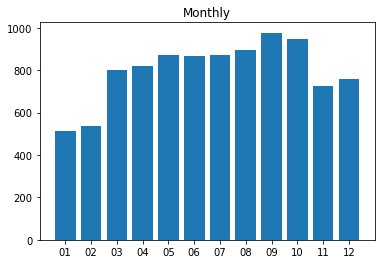

In [30]:
plt.bar(data=df, x='month', height='count')
plt.title('Monthly')
plt.show()

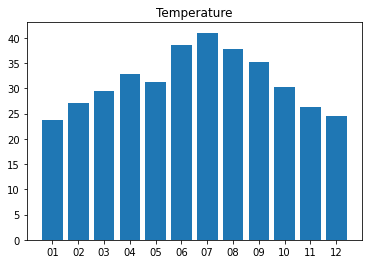

In [31]:
plt.bar(data=df, x='month', height='temp')
plt.title('Temperature')
plt.show()

- 연도별로 보았을 때 대여량이 상승한 것으로 보아 자전거대여 서비스의 인프라의 확대, 자전거를 이용한 취미활동에 대한 인식 개선과 같은 요소로 인해 대여량이 증가한 것으로 생각합니다. 

- 월별로 보았을 때 온난한 계절인 3월부터 9월까지 꾸준히 상승하였으며 9월 이후 외부활동이 힘든 계절로 넘어가면서 다시 대여량이 감소하는 형태로 진행된다고 생각합니다. 

- 특히 월별 대여량의 변화가 극적인 시기로 12-1월, 2-3월 그리고 10-11월이 있습니다. 2-3월과 10-11월은 공통적으로 기온을 보았을 때 20도 후반을 기점으로 갈라지는 것을 보아 해당 서비스를 이용하는 사람들이 느끼기에 평균 기온이 20도 후반 이하로 갈 때 대여하는 양이 줄어드는 것이라고 생각됩니다. 다만 12-1월의 경우 월별과 온도별 효과 이 외의 효과가 존재할 것으로 생각됩니다.

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [32]:
df['ym'] = df['datetime'].dt.strftime('%y.%m')

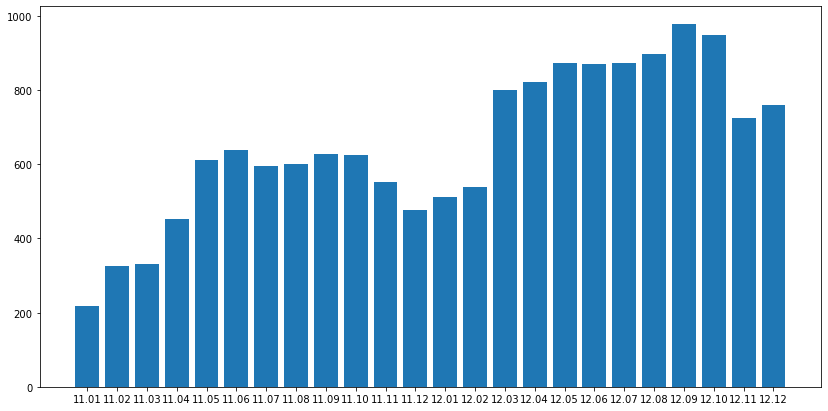

In [33]:
plt.figure(figsize=(14,7))
plt.bar(data=df, x='ym', height='count')
plt.show()

- 연도별로만 보았을 땐 대여량이 상승했기 때문에 이를 감안하여 데이터를 바라볼 필요가 있었고 실제로 동일한 월별로 비교하였을 때 전반적인 상승이 확인되어 연도별 효과와 월별 효과를 구분하여 볼 수 있습니다. 

- 앞서 월별 효과 중 12월과 1월에서 큰 차이가 보인 것은 11년 12월과 1월이 2011년의 시장의 성장으로 인한 효과가 반영되었다면 12년 12월의 경우 2011년과 2012년의 시장의 성장이 동시에 반영된 것이 확인되기 때문에 월별로 합친 경우 1월에 비해 12월이 더 높은 대여량을 가지는 착시가 일어난다고 생각합니다.

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

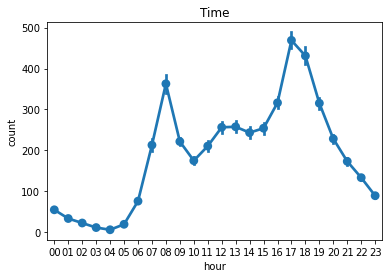

In [34]:
sns.pointplot(x='hour', y='count', data=df)
plt.title('Time')
plt.show()

- 2번의 peak이 존재하고 있으며 그 시간은 7-8시와 17-18시로 출퇴근시간에 해당하여 해당 서비스는 주로 직장을 다니는 사람들에게 많이 사용되고 있음을 알 수 있다. 특히 17-18시에 사용량이 더 많은 이유는 오전 출근시간에 비해 다른 용도로 충분히 사용되고 있기 때문이다. 

-  또한 출퇴근 시간에 비해 10시이후 증가폭은 완만한 형태를 띠고 있는데 이는 개인 여가 등의 이유로 대여하는 사람들은 출퇴근을 위해 사용하는 사람들에 비해 더 긴 시간을 분산된 시간에 사용하기 때문에 나타나는 현상으로 생각됩니다. 앞서 언급한 효과는 7-8시에 비해 17-18시에서 감소추세가 더딘 것을 통해 판단할 수 있습니다. 

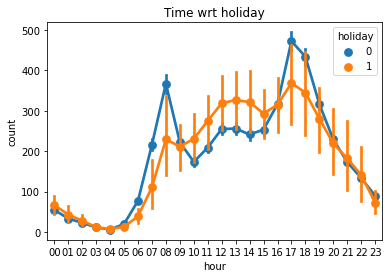

In [35]:
sns.pointplot(x='hour', y='count', data=df, hue='holiday')
plt.title('Time wrt holiday')
plt.show()

C:\Users\ay011\anaconda3\envs\urp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


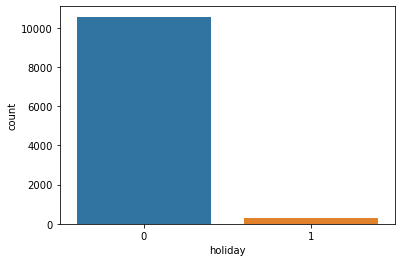

In [36]:
sns.countplot('holiday', data=df)
plt.show()

바로 위의 count plot을 통해 0이 근무일, 1이 휴일로 판단하였습니다.
이를 토대로 holiday에 따른 대여량의 분석은 다음과 같습니다.

- 우선 전반적으로 근무일에 비해 휴일의 error bar가 전반적으로 더 크게 확인됩니다. 이는 근무일의 경우 사소한 요소를 제외하곤 일반적인 루틴으로 지내는 반면, 휴일의 경우 꼭 모든 사람들이 다 쉬는 것인 아니며 쉰다고 하더라도 기존의 사용자가 자전거를 이용하지 않고 다른 방식으로 하루를 보내게 됩니다. 또한 날씨처럼 자전거 사용에 영향을 끼칠 수 있는 요소에 의한 변동은 휴일에 크게 나타날 것입니다.

- 앞서 시간별 대여량을 분석할 때 peak의 원인이 되었던 출퇴근의 경우 holiday에선 동일한 시간대에 눈에 띄는 peak이 보이지 않으며 오히려 출퇴근 이외의 사용자가 등장하는 10시 이후에 더 큰 증가세가 확인됩니다.

-  허나 야간시간대처럼 휴일과 무관히 외부활동에 제약이 있는 시간대에는 동일한 움직임이 확인됩니다.

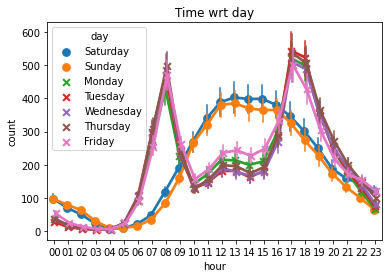

In [37]:
sns.pointplot(x='hour', y='count', data=df, hue='day', errwidth=1.5, dodge=True,
             markers=['o','o','x','x','x','x','x'])
plt.title('Time wrt day')
plt.show()

- 요일에 대한 효과를 보았을 때 크게 주말(Sat, Sun)과 평일로 구분되어 움직임을 나타내며 이는 출퇴근의 유무가 다르기 때문에 그로 인한 대여량에도 차이가 있음을 확인할 수 있습니다.

- 주말의 경우 휴일과 비슷한 움직임을 보이며 출근 이외의 목적으로 사용하는 것이 많이 확인됩니다. 이와 달리 평일의 경우 출퇴근 시간에 동일하게 peak가 확인됩니다.

- 특별한 점으로, 평일 중 금요일의 경우 다른 평일과 달리 낮 시간대에 유의미하게 차이가 있는 것으로 보이는데, 이는 휴가를 사용할 때 금요일을 선호하는 효과가 있지 않을까 생각합니다. 또한 0-2시의 새벽 시간대에의 사용량을 보았을 때 주말의 경우 늦은시간의 사용자가 증가한다는 것을 확인할 수 있습니다. 

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [38]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

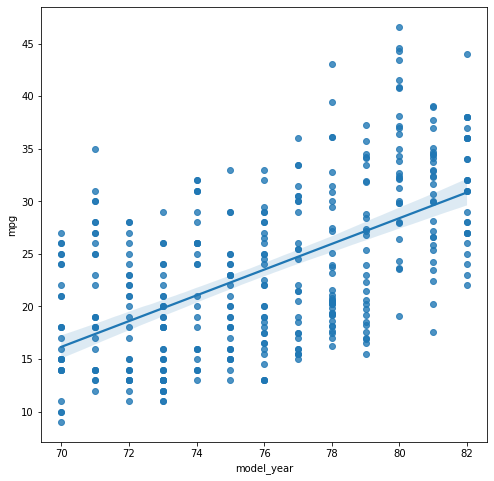

In [39]:
plt.figure(figsize=(8,8))
sns.regplot(x='model_year', y='mpg', data=mpg)
plt.show()

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
